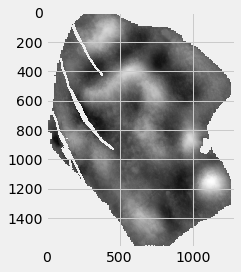

In [101]:
##import image data
import numpy as np
from pathlib import Path
from skimage import io

pathlist = Path('D:/Pigeon Cove/Ivesheadiomorphs/ives_png').rglob('*.png')


img = []
phs = []
for path in pathlist:
    img.append(io.imread(path))
    phs.append(path)
    

io.imshow(img[22])
#[0 3 2 2 3 3 2 2 0 1 1 3 2 2 3 3 3 3 2 1 1 3 3 3 0 0 3 0 0]

In [104]:
ives = [1, 10, 11, 12, 13, 14,15,16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 4, 5, 6, 7, 8, 9]



In [118]:
#convert image to array then binarize then filter
from gtda.images import Binarizer
from gtda.images import RadialFiltration
from gtda.images import HeightFiltration

ims = []
for x in img:
    im = np.asarray(x)
    im = im[:, :, 0]
    im = im[None, :, :]#reshape

    #binarize
    binarizer = Binarizer(threshold = 0.5)
    img_bin = binarizer.fit_transform(im)
    
    #radial filtration
    #radial_filtration = RadialFiltration(center=np.array([round(im.shape[0]/2), round(im.shape[1]/2)]))
    #im_filtration = radial_filtration.fit_transform(img_bin)
    
    #height filtration
    height_filtration = HeightFiltration()
    im_filtration = height_filtration.fit_transform(img_bin)

    #append to list
    ims.append(im_filtration)
    


In [119]:
#Get persistence diagram
from gtda.homology import CubicalPersistence
from gtda.diagrams import Scaler
from gtda.diagrams import Filtering

cubical_persistence = CubicalPersistence(n_jobs=-1)
scaler = Scaler()
filtering = Filtering()



pd = []
for x in ims:
    im_cubical = cubical_persistence.fit_transform(x)
    im_scaled = scaler.fit_transform(im_cubical) #scale
    im_filtered = filtering.fit_transform(im_scaled) #filter

    pd.append(im_filtered)



cubical_persistence.plot(im_cubical)
#scaler.plot(im_scaled)
#filtering.plot(im_filtered)

In [120]:
filtering.plot(im_filtered)

In [121]:
from gtda.diagrams import PersistenceImage

persistenceimage = PersistenceImage()

from gtda.diagrams import PersistenceEntropy

PE = PersistenceEntropy()

pi = []
for x in pd:
    #im_pers = persistenceimage.fit_transform(x) 
    im_pers = PE.fit_transform(x)
    im_pers_f = np.ndarray.flatten(im_pers)
    pi.append(im_pers_f)
    
#create array
pis = np.asarray(pi)
print(pis.shape)    


(29, 2)


C:\Users\katie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



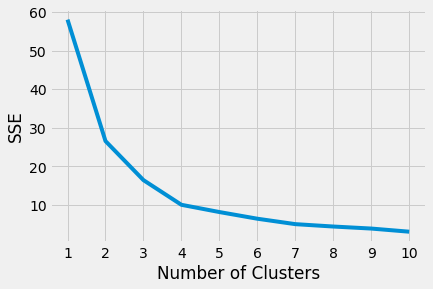

4


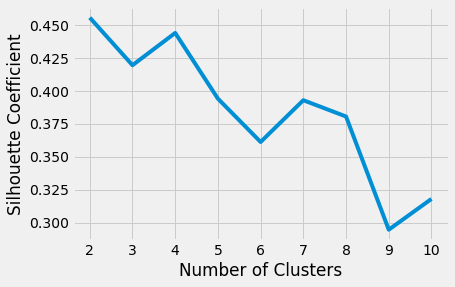

In [122]:


import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = scaler.fit_transform(pis)


kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(scaled_features)
   sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(scaled_features)
   score = silhouette_score(scaled_features, kmeans.labels_)
   silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


In [123]:
kmeans = KMeans(
init="random",
n_clusters=4,
n_init=10,
max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_
print(cluster_labels) #10 (18) and 20 (27)

print(kmeans.inertia_)

for path in pathlist:
    print(path)


[2 0 1 1 0 0 1 1 2 3 3 0 1 2 0 0 0 0 1 3 3 0 0 0 2 2 0 2 2]
10.085079367724964


In [124]:
import pandas as pd
df = pd.DataFrame(zip(ives, cluster_labels), columns=['ives','cluster'])

print(df)

    ives  cluster
0      1        2
1     10        0
2     11        1
3     12        1
4     13        0
5     14        0
6     15        1
7     16        1
8     17        2
9     18        3
10    19        3
11     2        0
12    20        1
13    21        2
14    22        0
15    23        0
16    24        0
17    25        0
18    26        1
19    27        3
20    28        3
21    29        0
22     3        0
23     4        0
24     5        2
25     6        2
26     7        0
27     8        2
28     9        2
